In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_palette("pastel")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
gap_train = pd.read_csv("https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-development.tsv", delimiter='\t')
gap_test = pd.read_csv("https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-test.tsv", delimiter='\t')
gap_valid = pd.read_csv("https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-validation.tsv", delimiter='\t')

In [3]:
test_stage_1 = pd.read_csv('test_stage_1.tsv', delimiter='\t')
sub = pd.read_csv('sample_submission_stage_1.csv')

In [4]:
gap_train.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera


In [5]:
gap_test.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,test-1,Upon their acceptance into the Kontinental Hoc...,His,383,Bob Suter,352,False,Dehner,366,True,http://en.wikipedia.org/wiki/Jeremy_Dehner
1,test-2,"Between the years 1979-1981, River won four lo...",him,430,Alonso,353,True,Alfredo Di St*fano,390,False,http://en.wikipedia.org/wiki/Norberto_Alonso
2,test-3,Though his emigration from the country has aff...,He,312,Ali Aladhadh,256,True,Saddam,295,False,http://en.wikipedia.org/wiki/Aladhadh
3,test-4,"At the trial, Pisciotta said: ``Those who have...",his,526,Alliata,377,False,Pisciotta,536,True,http://en.wikipedia.org/wiki/Gaspare_Pisciotta
4,test-5,It is about a pair of United States Navy shore...,his,406,Eddie,421,True,Rock Reilly,559,False,http://en.wikipedia.org/wiki/Chasers


In [6]:
gap_valid.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,validation-1,He admitted making four trips to China and pla...,him,256,Jose de Venecia Jr,208,False,Abalos,241,False,http://en.wikipedia.org/wiki/Commission_on_Ele...
1,validation-2,"Kathleen Nott was born in Camberwell, London. ...",She,185,Ellen,110,False,Kathleen,150,True,http://en.wikipedia.org/wiki/Kathleen_Nott
2,validation-3,"When she returns to her hotel room, a Liberian...",his,435,Jason Scott Lee,383,False,Danny,406,True,http://en.wikipedia.org/wiki/Hawaii_Five-0_(20...
3,validation-4,"On 19 March 2007, during a campaign appearance...",he,333,Reucassel,300,True,Debnam,325,False,http://en.wikipedia.org/wiki/Craig_Reucassel
4,validation-5,"By this time, Karen Blixen had separated from ...",she,427,Finch Hatton,290,False,Beryl Markham,328,True,http://en.wikipedia.org/wiki/Denys_Finch_Hatton


In [7]:
test_stage_1.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera


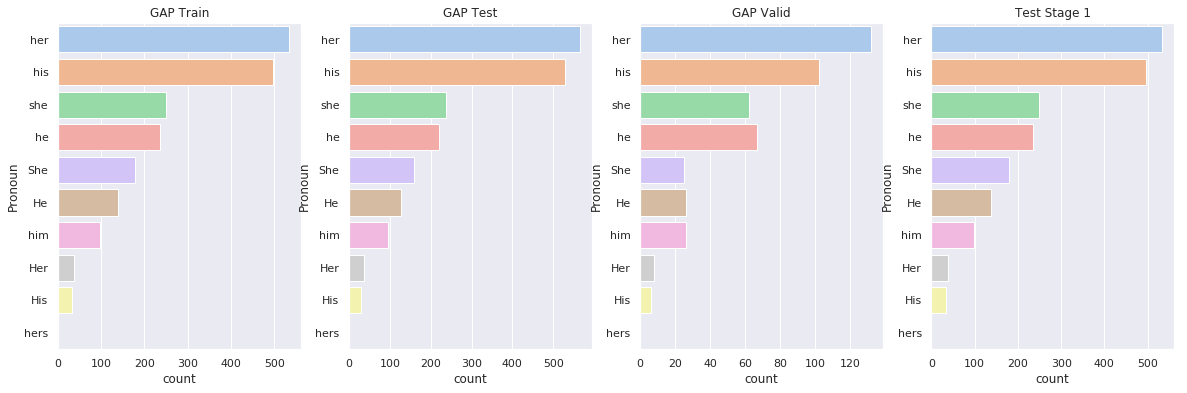

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20,6))
ordering = ['her', 'his', 'she', 'he', 'She', 'He', 'him', 'Her', 'His', 'hers']

sns.countplot(y='Pronoun',order = ordering, ax=ax[0], data=gap_train)
ax[0].set_title("GAP Train")

sns.countplot(y='Pronoun',order = ordering, ax=ax[1], data=gap_test)
ax[1].set_title("GAP Test")

sns.countplot(y='Pronoun',order = ordering, ax=ax[2], data=gap_valid)
ax[2].set_title("GAP Valid")

sns.countplot(y='Pronoun',order = ordering, ax=ax[3], data=test_stage_1)
ax[3].set_title("Test Stage 1");

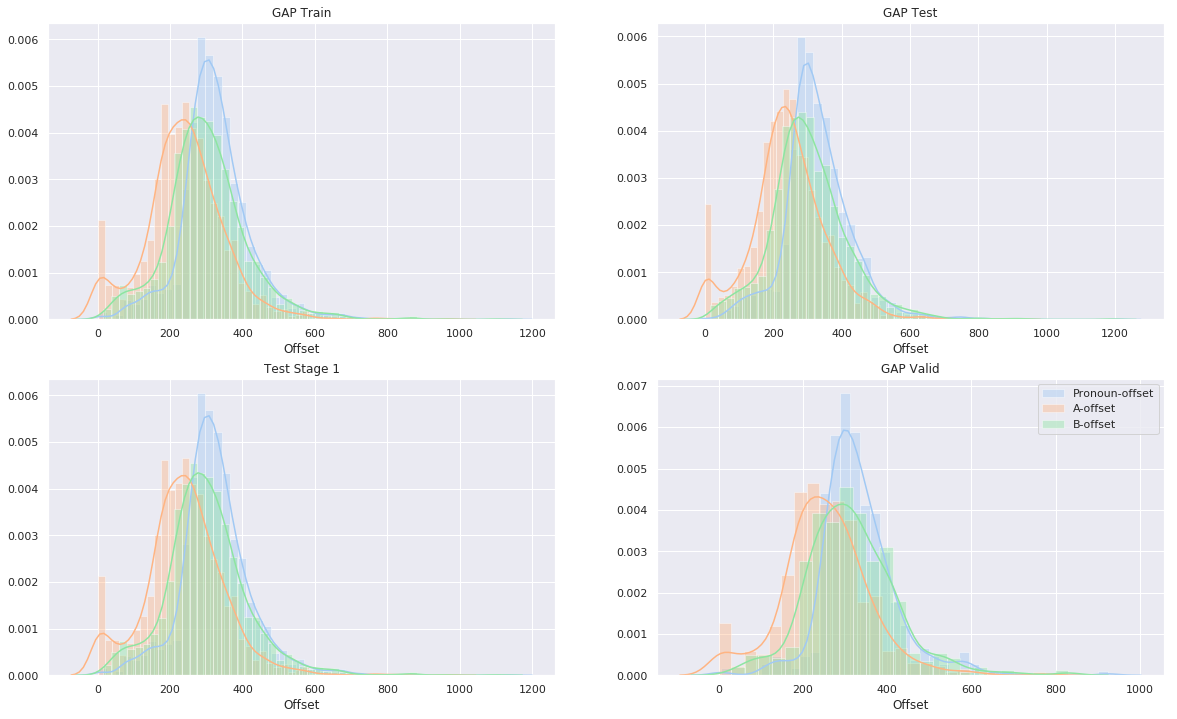

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,12))

sns.distplot(gap_train["Pronoun-offset"], ax=ax1, label="Pronoun-offset", kde=True)
sns.distplot(gap_train["A-offset"], ax=ax1, label="A-offset", kde=True)
sns.distplot(gap_train["B-offset"], ax=ax1, label="B-offset", kde=True)
ax1.set_title("GAP Train")
ax1.set(xlabel='Offset')

sns.distplot(gap_test["Pronoun-offset"], ax=ax2, label="Pronoun-offset", kde=True)
sns.distplot(gap_test["A-offset"], ax=ax2, label="A-offset", kde=True)
sns.distplot(gap_test["B-offset"], ax=ax2, label="B-offset", kde=True)
ax2.set_title("GAP Test")
ax2.set(xlabel='Offset')

sns.distplot(gap_valid["Pronoun-offset"], ax=ax4, label="Pronoun-offset", kde=True)
sns.distplot(gap_valid["A-offset"], ax=ax4, label="A-offset", kde=True)
sns.distplot(gap_valid["B-offset"], ax=ax4, label="B-offset", kde=True)
ax4.set_title("GAP Valid")
ax4.set(xlabel='Offset')

sns.distplot(test_stage_1["Pronoun-offset"], ax=ax3, label="Pronoun-offset", kde=True)
sns.distplot(test_stage_1["A-offset"], ax=ax3, label="A-offset", kde=True)
sns.distplot(test_stage_1["B-offset"], ax=ax3, label="B-offset", kde=True)
ax3.set_title("Test Stage 1")
ax3.set(xlabel='Offset')
plt.legend();

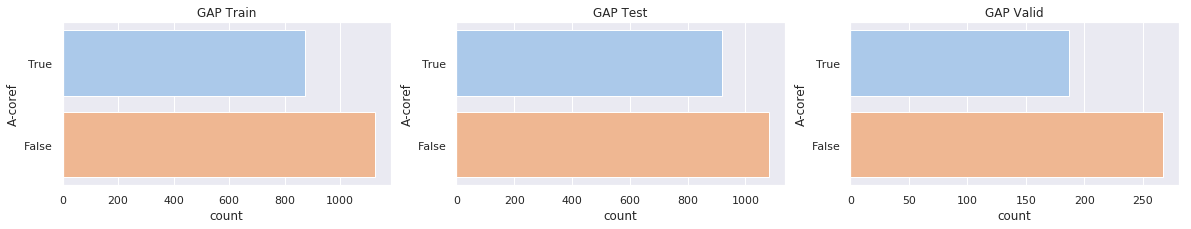

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20,3))
ordering = [True, False]

sns.countplot(y='A-coref', order = ordering, ax=ax[0], data=gap_train)
ax[0].set_title("GAP Train")

sns.countplot(y='A-coref',order = ordering, ax=ax[1], data=gap_test)
ax[1].set_title("GAP Test")

sns.countplot(y='A-coref',order = ordering, ax=ax[2], data=gap_valid)
ax[2].set_title("GAP Valid");

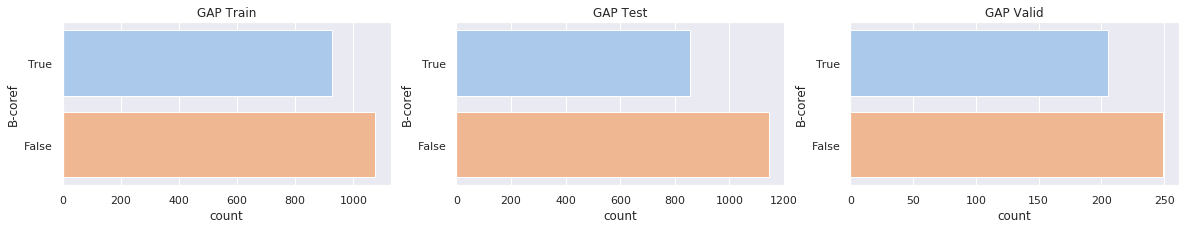

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(20,3))
ordering = [True, False]

sns.countplot(y='B-coref', order = ordering, ax=ax[0], data=gap_train)
ax[0].set_title("GAP Train")

sns.countplot(y='B-coref',order = ordering, ax=ax[1], data=gap_test)
ax[1].set_title("GAP Test")

sns.countplot(y='B-coref',order = ordering, ax=ax[2], data=gap_valid)
ax[2].set_title("GAP Valid");

In [12]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
import nltk
from sklearn import *

test = pd.read_csv('test_stage_1.tsv', delimiter='\t').rename(columns={'A': 'A_Noun', 'B': 'B_Noun'})
sub = pd.read_csv('sample_submission_stage_1.csv')
test.shape, sub.shape

((2000, 9), (2000, 4))

In [13]:
test['mask'] = test['Text'].map(lambda x: '*' * len(x))
test['mask'] = test.apply(lambda r: r['mask'][: r['Pronoun-offset']] + 'P' * len(str(r['Pronoun'])) + r['mask'][r['Pronoun-offset'] + len(str(r['Pronoun'])): ], axis=1)
test['mask'] = test.apply(lambda r: r['mask'][: r['A-offset']] + 'A' * len(str(r['A_Noun'])) + r['mask'][r['A-offset'] + len(str(r['A_Noun'])): ], axis=1)
test['mask'] = test.apply(lambda r: r['mask'][: r['B-offset']] + 'B' * len(str(r['B_Noun'])) + r['mask'][r['B-offset'] + len(str(r['B_Noun'])): ], axis=1)
test['section_min'] = test[['Pronoun-offset', 'A-offset', 'B-offset']].min(axis=1)
test['Pronoun-offset2'] = test['Pronoun-offset'] + test['Pronoun'].map(len)
test['A-offset2'] = test['A-offset'] + test['A_Noun'].map(len)
test['B-offset2'] = test['B-offset'] + test['B_Noun'].map(len)                               
test['section_max'] = test[['Pronoun-offset2', 'A-offset2', 'B-offset2']].max(axis=1)
print(test['Text'][0][test['section_min'][0]:test['section_max'][0]])
print(test['mask'][0][test['section_min'][0]:test['section_max'][0]])

Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her
AAAAAAAAAAAAAA**BBBBBBB************************************************************PPP


In [14]:
doc = nlp(test['Text'][0][test['section_min'][0]:test['section_max'][0]])
tokens = pd.DataFrame(
    [[token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop, [child for child in token.children]] for token in doc],
    columns=['text', 'lemma', 'pos', 'tag', 'dep', 'shape', 'is_alpha', 'is_stop', 'child'])
tokens

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,child
0,Cheryl,cheryl,PROPN,NNP,compound,Xxxxx,True,False,[]
1,Cassidy,cassidy,PROPN,NNP,ROOT,Xxxxx,True,False,"[Cheryl, ,, friend, and, pupil, .]"
2,",",",",PUNCT,",",punct,",",False,False,[]
3,Pauline,pauline,PROPN,NNP,poss,Xxxxx,True,False,['s]
4,'s,'s,PART,POS,case,'x,False,False,[]
5,friend,friend,NOUN,NN,appos,xxxx,True,False,[Pauline]
6,and,and,CCONJ,CC,cc,xxx,True,True,[]
7,also,also,ADV,RB,advmod,xxxx,True,True,[]
8,a,a,DET,DT,det,x,True,True,[]
9,year,year,NOUN,NN,nmod,xxxx,True,False,[11]


In [15]:
test['A'] = test.apply(lambda r: 0.45 if r['A-offset'] == r['section_min'] else 0.3, axis=1)
test['B'] = test.apply(lambda r: 0.45 if r['B-offset'] == r['section_min'] else 0.3, axis=1)
test['NEITHER'] = 1.0 - (test['A'] + test['B'])

In [16]:
test[['ID', 'A', 'B', 'NEITHER']].to_csv('submission.csv', index=False)